# MobileNetV2 Training

In [1]:
import tensorflow as tf
import keras
from keras import models
import matplotlib.pyplot as plt
import gc
import joblib

2024-12-05 06:48:58.261344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733381338.996168    1901 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733381339.193111    1901 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 06:49:01.186449: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Check if GPU is available using the recommended function
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
    # Your GPU-accelerated code here
else:
    print("GPU is not available. Check your TensorFlow installation.")

GPU is available.


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Memory growth set for GPU: {gpu}")
    except RuntimeError as e:
        print(e)

Memory growth set for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [7]:
IMG_SIZE = 224
BATCH_SIZE = 8
EPOCHS = 100

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('Birds_25/train/',
                                                              shuffle=True,
                                                              image_size = (IMG_SIZE,IMG_SIZE),
                                                              batch_size = BATCH_SIZE)

Found 30000 files belonging to 25 classes.


In [9]:
class_name = train_ds.class_names

class_name

['Asian-Green-Bee-Eater',
 'Brown-Headed-Barbet',
 'Cattle-Egret',
 'Common-Kingfisher',
 'Common-Myna',
 'Common-Rosefinch',
 'Common-Tailorbird',
 'Coppersmith-Barbet',
 'Forest-Wagtail',
 'Gray-Wagtail',
 'Hoopoe',
 'House-Crow',
 'Indian-Grey-Hornbill',
 'Indian-Peacock',
 'Indian-Pitta',
 'Indian-Roller',
 'Jungle-Babbler',
 'Northern-Lapwing',
 'Red-Wattled-Lapwing',
 'Ruddy-Shelduck',
 'Rufous-Treepie',
 'Sarus-Crane',
 'White-Breasted-Kingfisher',
 'White-Breasted-Waterhen',
 'White-Wagtail']

In [13]:
joblib.dump(class_name, "models/keras_mobilenetv2/class_name.pkl")

['models/keras_mobilenetv2/class_name.pkl']

In [7]:
# train_ds = train_ds.take(400)

In [19]:
test_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory('Birds_25/valid/',
                                                                      shuffle=True,
                                                                      image_size=(
                                                                          IMG_SIZE, IMG_SIZE),
                                                                      batch_size=BATCH_SIZE,
                                                                      seed=42,
                                                                      subset='both',
                                                                      validation_split=0.50)

Found 7500 files belonging to 25 classes.
Using 3750 files for training.
Using 3750 files for validation.


In [9]:
data_directory = r"Birds_25/train"
class_len = []

for name in class_name:
    class_length = len(list(tf.data.Dataset.list_files(
        data_directory + '/' + name + '/*')))
    print(f"Class {name}: {class_length} samples")
    class_len.append(class_length)

2024-12-04 10:27:04.123618: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class Asian-Green-Bee-Eater: 1200 samples


2024-12-04 10:27:04.635882: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class Brown-Headed-Barbet: 1200 samples
Class Cattle-Egret: 1200 samples


2024-12-04 10:27:05.653129: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class Common-Kingfisher: 1200 samples
Class Common-Myna: 1200 samples
Class Common-Rosefinch: 1200 samples
Class Common-Tailorbird: 1200 samples


2024-12-04 10:27:07.720780: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class Coppersmith-Barbet: 1200 samples
Class Forest-Wagtail: 1200 samples
Class Gray-Wagtail: 1200 samples
Class Hoopoe: 1200 samples
Class House-Crow: 1200 samples
Class Indian-Grey-Hornbill: 1200 samples
Class Indian-Peacock: 1200 samples
Class Indian-Pitta: 1200 samples


2024-12-04 10:27:11.718573: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class Indian-Roller: 1200 samples
Class Jungle-Babbler: 1200 samples
Class Northern-Lapwing: 1200 samples
Class Red-Wattled-Lapwing: 1200 samples
Class Ruddy-Shelduck: 1200 samples
Class Rufous-Treepie: 1200 samples
Class Sarus-Crane: 1200 samples
Class White-Breasted-Kingfisher: 1200 samples
Class White-Breasted-Waterhen: 1200 samples
Class White-Wagtail: 1200 samples


In [10]:
len(test_ds),len(val_ds)

(469, 469)

In [11]:
# test_ds = test_ds.take(70)

In [12]:
# val_ds = val_ds.take(40)

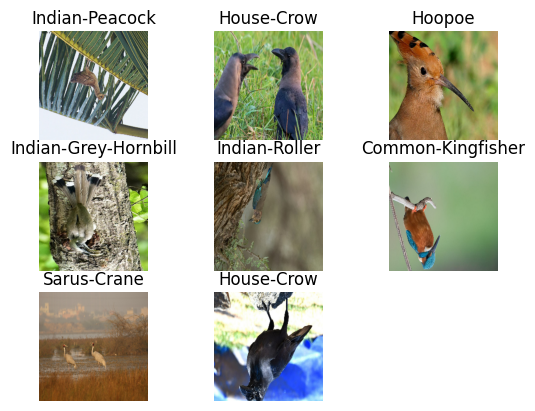

In [22]:
for image,label in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(3,3,i+1)
        plt.title(class_name[label[i]])
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

In [13]:
# train_ds = train_ds.cache().shuffle(30).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(30).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(30).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
rescale_resize = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE,IMG_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [15]:
pre_trained_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='max',
    classes=25,
    classifier_activation="softmax",
)

In [16]:
for layers in pre_trained_model.layers:
    layers.trainable=False

In [17]:
# Define a function to apply data augmentation to an image
def augment_image(image, label):
    # Randomly adjust the brightness of the image
    image = tf.image.random_brightness(image, max_delta=0.2)

    # Randomly rotate the image
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    return image, label

# Assuming x_train and y_train are already created as tf.data.Dataset batches
# Apply data augmentation to the training data
augmented_train_ds = train_ds.map(augment_image)

In [18]:
CHANNELS = 3
INPUT_SHAPE = (BATCH_SIZE,IMG_SIZE,IMG_SIZE,CHANNELS)


model = models.Sequential([
    rescale_resize,
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(25,activation="softmax")
])

model.build(input_shape=INPUT_SHAPE)

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (8, 224, 224, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (8, 1280)              │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (8, 1280)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (8, 1280)              │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 200)               │       256,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (8, 200)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (8, 200)               │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 25)                │         5,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,525,129 (9.63 MB)

 Trainable params: 264,185 (1.01 MB)

 Non-trainable params: 2,260,944 (8.62 MB)

In [20]:
model.compile(optimizer ='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['acc'])

In [21]:
gc.collect()
keras.backend.clear_session()

In [22]:
history = model.fit(augmented_train_ds,validation_data=val_ds,epochs=EPOCHS)

Epoch 1/100


I0000 00:00:1733308043.679237    1767 service.cc:148] XLA service 0x7f1b7c022630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733308043.690334    1767 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-04 10:27:24.015057: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733308045.112368    1767 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/3750 ━━━━━━━━━━━━━━━━━━━━ 1:51 30ms/step - acc: 0.0312 - loss: 4.1470       

I0000 00:00:1733308061.876783    1767 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 131s 29ms/step - acc: 0.6266 - loss: 1.2928 - val_acc: 0.8437 - val_loss: 0.5063
Epoch 2/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - acc: 0.7633 - loss: 0.7808 - val_acc: 0.8573 - val_loss: 0.4527
Epoch 3/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 104s 28ms/step - acc: 0.7904 - loss: 0.6840 - val_acc: 0.8672 - val_loss: 0.4258
Epoch 4/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 104s 28ms/step - acc: 0.7992 - loss: 0.6509 - val_acc: 0.8709 - val_loss: 0.4095
Epoch 5/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 106s 28ms/step - acc: 0.8078 - loss: 0.6170 - val_acc: 0.8755 - val_loss: 0.3885
Epoch 6/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 106s 28ms/step - acc: 0.8154 - loss: 0.6025 - val_acc: 0.8795 - val_loss: 0.3774
Epoch 7/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 106s 28ms/step - acc: 0.8217 - loss: 0.5690 - val_acc: 0.8795 - val_loss: 0.3804
Epoch 8/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 105s 28ms/step - acc: 0.8288 - loss: 0.5487 - val_acc: 0.8835 - val_loss: 0.3764
Epoch 9/100
3750/375

In [25]:
model.evaluate(test_ds)

469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - acc: 0.9307 - loss: 0.2235


[0.2651154100894928, 0.918666660785675]

In [24]:
model.save('models/keras_mobilenetv2/ib25_mobilenetv2.keras')

# loading testing and graphing

In [15]:
from IPython.display import clear_output
import joblib
import keras
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

In [16]:
bird_model = keras.models.load_model('models/keras_mobilenetv2/ib25_mobilenetv2.keras')

/home/sidthechillguy/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
class_name = joblib.load('models/keras_mobilenetv2/class_name.pkl')
class_name

['Asian-Green-Bee-Eater',
 'Brown-Headed-Barbet',
 'Cattle-Egret',
 'Common-Kingfisher',
 'Common-Myna',
 'Common-Rosefinch',
 'Common-Tailorbird',
 'Coppersmith-Barbet',
 'Forest-Wagtail',
 'Gray-Wagtail',
 'Hoopoe',
 'House-Crow',
 'Indian-Grey-Hornbill',
 'Indian-Peacock',
 'Indian-Pitta',
 'Indian-Roller',
 'Jungle-Babbler',
 'Northern-Lapwing',
 'Red-Wattled-Lapwing',
 'Ruddy-Shelduck',
 'Rufous-Treepie',
 'Sarus-Crane',
 'White-Breasted-Kingfisher',
 'White-Breasted-Waterhen',
 'White-Wagtail']

In [25]:
y_true = []

y_pred = []

for image,label in test_ds:
    try:
        for i in range(BATCH_SIZE):
            img = np.expand_dims(image[i].numpy(),axis=0)
            y_pred.append(np.argmax(bird_model.predict(img)))
            y_true.append(label[i].numpy())
            clear_output(wait=True)
    except:
        print("Test method reached the end of testing dataset slices. Aborted for further runs.")

Test method reached the end of testing dataset slices. Aborted for further runs.


2024-12-05 07:11:17.730201: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: slice index 6 of dimension 0 out of bounds.
2024-12-05 07:11:17.816659: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [46]:
clsrpt = classification_report(y_true,y_pred,target_names=class_name,output_dict=True)
confmat = confusion_matrix(y_pred, y_true)

<Axes: >

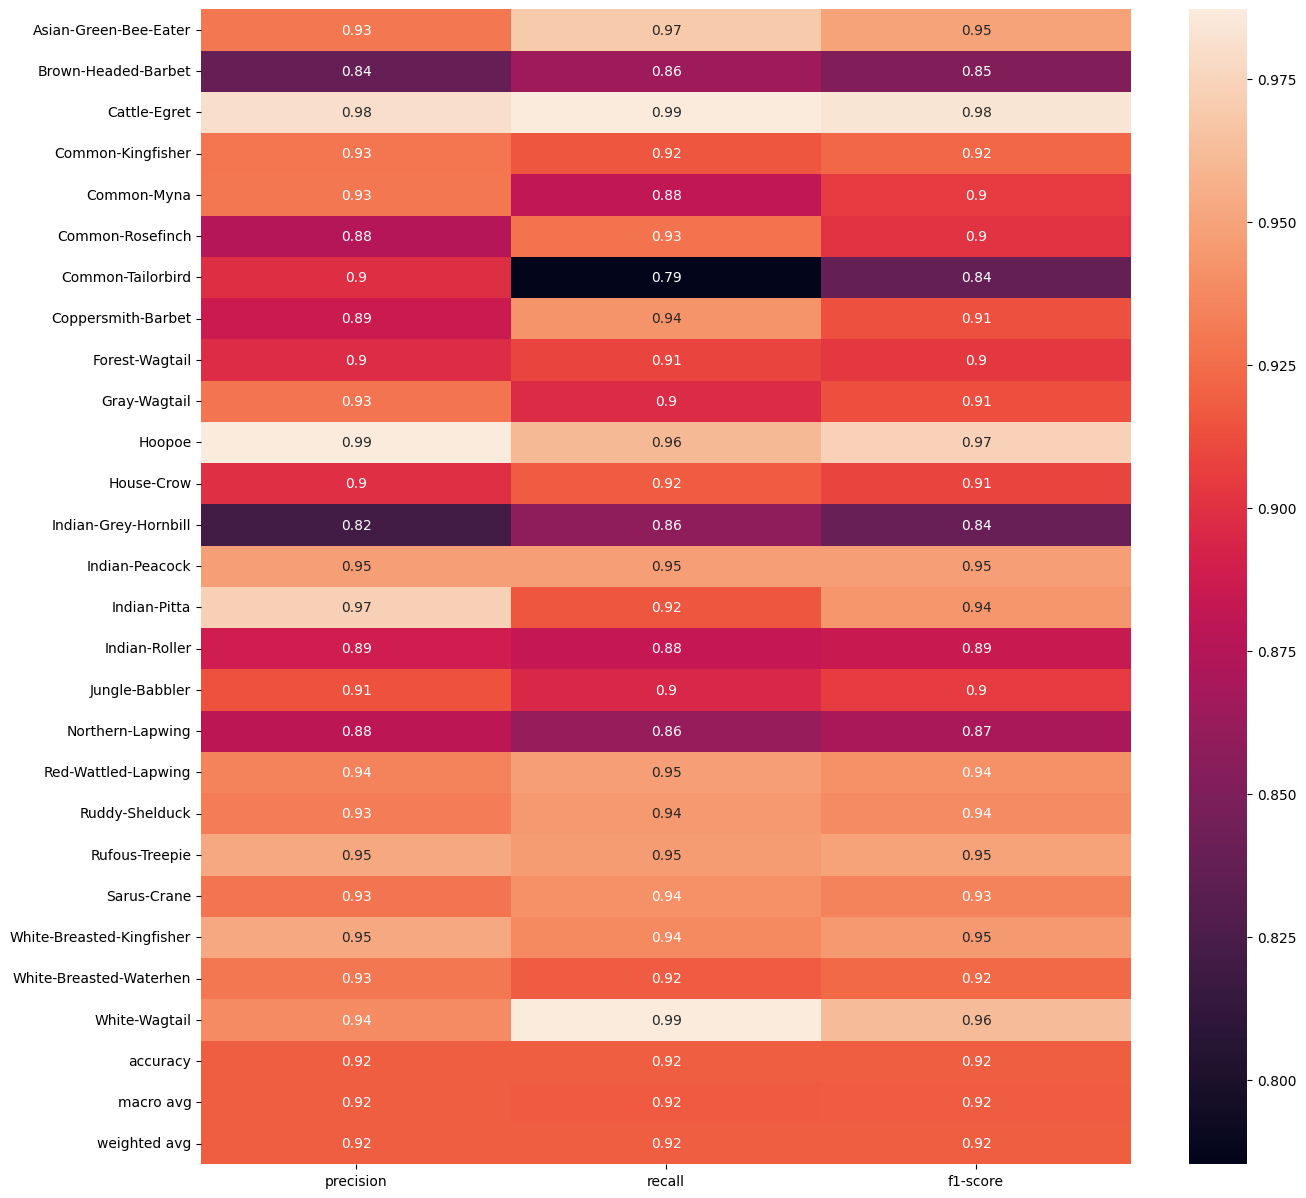

In [49]:
plt.figure(figsize=(15,15))

# we remove support to adjust the 
sns.heatmap(pd.DataFrame(clsrpt).iloc[:-1,:].T, annot=True)

<Axes: >

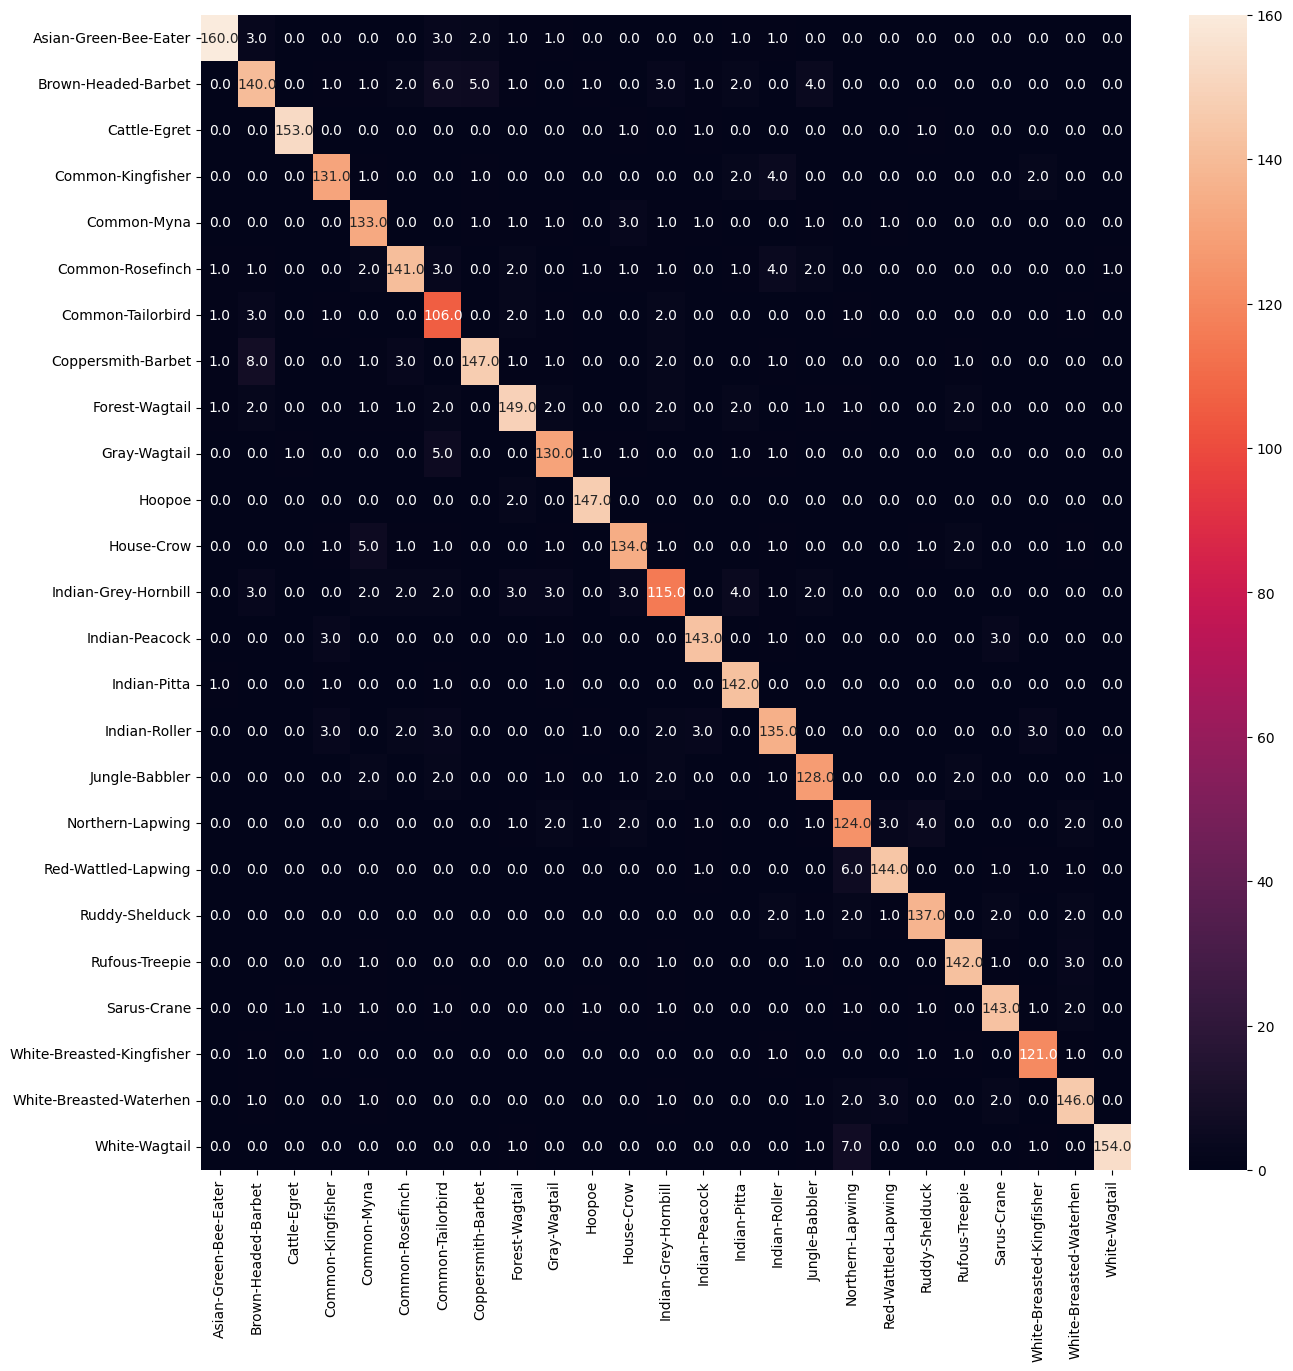

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(confmat, annot=True, fmt='.1f',xticklabels=class_name, yticklabels=class_name)

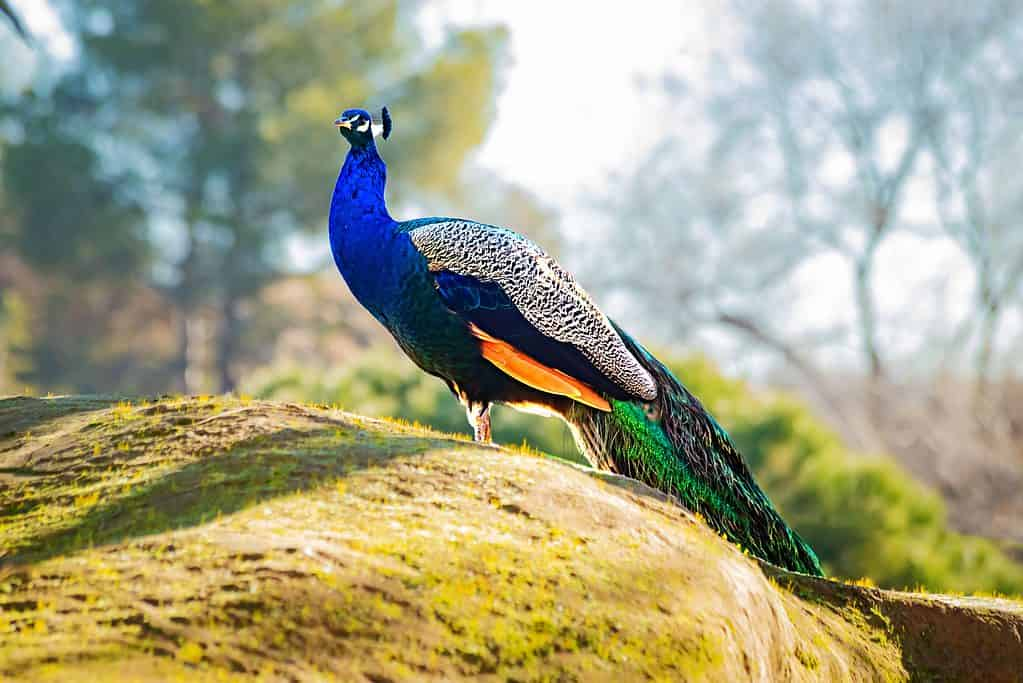

In [65]:
test = Image.open('test_images/indp.jpg')
test

In [68]:
test = keras.preprocessing.image.img_to_array(test)
test = np.expand_dims(test,axis=0)
class_name[np.argmax(bird_model.predict(test))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


'Indian-Peacock'